## Exercício 13/Semana 2


Considere o PVI $\displaystyle y'=\alpha x^{\alpha-1},\quad y(0)=0$, com $\alpha>0$.
A solução exata é $\varphi(x)=x^{\alpha}$. Essa solução é $C^2$ se e somente se 
$\alpha \geq 2$.

1. Use o método de Euler para resolver o problema de valor inicial no intervalo $[\varepsilon,1 + \varepsilon]$ para $\alpha = 2.5, 1.5, 1.1$ com tamanho do passo $h = 0.2, 0.1, 0.05$ e para diferentes valores de $\varepsilon>0$, pequenos. Calcule o erro em cada ponto da malha.


2. Determine numericamente a ordem de convergência do método de Euler para cada um destes problemas. 


3. Repita (a) e (b) com os métodos de Taylor de ordens 2 e 4. Comente seus resultados.


4. Organize seus resultados em gráficos e escreva suas conclusões.


## 1. Bibliotecas

In [1]:
#NumPy é a principal biblioteca para cálculos científicos de Python. Ela disponibiliza o objeto multidimensional 
#arranjo, objetos derivados, e um conjuntos de rotinas para operações rápidas sobre arranjos.
import numpy as np
#SymPy é uma biblioteca para cálculos simbólicos como integração exata, derivação, 
#resolução de equações, expansão em série de Taylor, etc
#import sympy as sp 
#pandas é uma ferramenta de código aberto construída sobre Python para análise e manipulação de dados 
#import pandas as pd
#Para mostrar tabelas mais bonitas
#from IPython.display import HTML
#Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Funções

In [1]:
def f(a, b):# função no membro direito da equação
    return alpha*a**(alpha-1)
def phi(a):# solução exata da equação
    return a**alpha
def d1_phi(a):# primeira derivada da solução exata da equação
    return alpha*a**(alpha-1)
def d2_phi(a):# segunda derivada da solução exata da equação
    return alpha*(alpha-1)*a**(alpha-2)
def d3_phi(a):# terceira derivada da solução exata da equação
    return alpha*(alpha-1)*(alpha-2)*a**(alpha-3)
def d4_phi(a):# quarta derivada da solução exata da equação
    return alpha*(alpha-1)*(alpha-2)**(alpha-3)*a**(alpha-4)

## 3. Inicialização de algumas variáveis

In [3]:
#Valores iniciais
epsilon = 0.01
x0 = epsilon
X = 1 + epsilon
#Valores de alfa
lista_alpha = [2.5,1.5,1.1]
#Valores de h
lista_h = [0.2,0.1,0.05]
# Malhas para x
lista_x = []
for h in lista_h:
    N = int((X-x0) / h)   # quantidade de passos
    x = np.linspace(x0, X, num=N+1)  # malha em x
    lista_x.append(x) #armazenar malha 

## 4. Implementação dos métodos

In [4]:
#Iteração do Método de Euler
def passo_Euler(x, y, h):
    """
    Executa uma iteração do método de Euler.
    
    Parâmetros
    ----------
    y : float.
        Aproximação da solução no ponto anterior.
    f : function
        Função para avaliar o termo direito do sistema.
    h : float
        Passo.
    
    Retorna
    -------
    y_novo : float
             Aproximação da solução no ponto anterior.
    """
    y_novo = y + h * f(x,y)
    return y_novo   

A iteração do método de Taylor de ordem 2 pode ser escrita da forma
$$y_{j+1} = y_j + h\varphi'(x_j) + \frac{h^2}{2}\varphi''(x_j).$$

In [5]:
#Iteração do Método de Taylor de ordem 2
def passo_Taylor2(x, y, h):
    """
    Executa uma iteração do método de Taylor de ordem 2.
    
    Parâmetros
    ----------
    y : float.
        Aproximação da solução no ponto anterior.
    h : float
        Passo.
    
    Retorna
    -------
    y_novo : float
             Aproximação da solução no ponto anterior.
    """
    y_novo = y + h * d1_phi(x) + 0.5 * h**2 * d2_phi(x)
    return y_novo 

A iteração do método de Taylor de ordem 4 pode ser escrita da forma
$$y_{j+1} = y_j + h\varphi'(x_j) + \frac{h^2}{2}\varphi''(x_j) + \frac{h^3}{6}\varphi'''(x_j) + \frac{h^4}{24}\varphi^{(4)}(x_j).$$

In [6]:
#Iteração do Método de Taylor de ordem 4
def passo_Taylor4(x, y, h):
    """
    Executa uma iteração do método de Taylor de ordem 4.
    
    Parâmetros
    ----------
    y : float.
        Aproximação da solução no ponto anterior.
    h : float
        Passo.
    
    Retorna
    -------
    y_novo : float
             Aproximação da solução no ponto anterior.
    """
    y_novo = y + h * d1_phi(x) + 0.5 * h**2 * d2_phi(x) + (h**3/6) * d3_phi(x) +  (h**4/24) * d2_phi(x)
    return y_novo 

In [7]:
def implementa_metodo(metodo):
    """
    Implementação do método.
    
    Parâmetros
    ----------
    metodo : function
        Função contendo o método a ser implementado.
    
    Retorna
    -------
    E : numpy array
        Vetor com os máximos dos módulos dos erros para cada
        valor de h.
    """

    # Lista com as soluções aproximadas para cada malha
    lista_y = []
    # Lista com os erros absolutos de cada malha
    erros_abs = []
    #Aplicamos o método de Euler
    for j in range(len(lista_h)):
        h = lista_h[j]
        N = int((X-x0) / h)   # quantidade de passos
        x = lista_x[j]  # malha em x correspondente a h
        y = np.empty_like(x) #inicializar y
        y[0] = phi(x[0]) #y inicial
        # N iterações do método de Euler.
        for n in range(N):
            y[n + 1] = metodo(x[n],y[n],h) #iteração do método de Euler
        lista_y.append(y)  # armazenar arranjo com as aproximações usando essa malha
        erros_abs. append(phi(x)-y) # armazenar erro global
    E = np.array([np.max(np.abs(erros_abs[j])) for j in range(len(lista_h))]) # Cálculo de E(h) 
#    return lista_x, lista_y, erros_abs
    return erros_abs, E

## 5. Implementação das representações gráficas

In [8]:
def plotar_erros_semilog(nome_metodo, vet_erros_abs):
    """
    Função para plotar os erros dos métodos na escala semilog.
    
    Parâmetros
    ----------
    nome_metodo : string.
        Método a ser implementado.
    vet_erros_abs : list
        Lista com 3 elementos. Cada elemento é uma lista com três numpy arrays
        contendo os erros absolutos para cada valor de h para um valor de alpha.
    """

    #figura
    linhas = 1
    colunas = 3
    figsize = (15, 6)
    fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
    fig.suptitle('Erros absolutos na escala semilog. Método de ' + nome_metodo)
    #axs[0].set_ylabel(r'$\varphi$ e $y_h$')
    for j in range(3):
        axs[j].set_title(r'$\alpha=$' + str(lista_alpha[j]))
        axs[j].set_xlabel('x') 
        axs[j].set_ylabel('Erros absolutos na escala logarítmica')
        axs[j].grid(True)
        axs[j].set_ylim((2**(-16), 1/4))
        # plotar log-log 
        axs[j].semilogy(base = 2)
        for l in range(len(lista_h)):
            axs[j].plot(lista_x[l][1:], abs(vet_erros_abs[j][l][1:]), \
             label='h='+str(lista_h[l]), color = 'C'+str(l+1), marker='+', linewidth=1, linestyle='--')    
        
        axs[j].legend();
     #   axs[j].axis('equal');  # make axes scale equally 

In [9]:
def plotar_erros_loglog(nome_metodo, vet_E):
    """
    Função para plotar os erros dos métodos na escala log-log.
    
    Parâmetros
    ----------
    nome_metodo : string.
        Método a ser implementado.
    vet_E : list
        Lista com 3 elementos. Cada elemento é um numpy array com E(h) para 
        um valor de alpha.
    """

    #figura
    linhas = 1
    colunas = 3
    figsize = (15, 6)
    fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
    fig.suptitle('Máximo dos erros absolutos na escala log-log. Método de ' + nome_metodo)
    #ciclo variando o valor de alpha
    for j in range(3):
        #Coeficiente angular do segmento verde
        coef = (np.log(vet_E[j][0])- np.log(vet_E[j][2]))/(np.log(lista_h[0]) - np.log(lista_h[2]))
        axs[j].set_title(r'$\alpha=$' + str(lista_alpha[j]) + '.  Coeficiente = ' + str(round(coef,3)))
        axs[j].set_xlabel('h') 
        axs[j].set_ylabel(r'E(h)')
        axs[j].grid(True)
        # plotar log-log 
        axs[j].loglog([0.2,0.1,0.05], vet_E[j], color='C0', linestyle='--', marker='o')  # plotar log-log 
        #Segmento entre os dois pontos nos extremos
        axs[j].loglog([0.05, 0.2], [vet_E[j][2], vet_E[j][0]], color='C1', linestyle='--')  # plotar log-log

        axs[j].axis('equal');  # make axes scale equally 


## 6. Resultados

### 6.1 Método de Euler

In [10]:
#Implementação método de Euler
vet_E_Euler = []
vet_erros_abs_Euler =[]
for alpha in lista_alpha:
    erros_abs, E = implementa_metodo(passo_Euler)
    vet_E_Euler.append(E)
    vet_erros_abs_Euler.append(erros_abs)

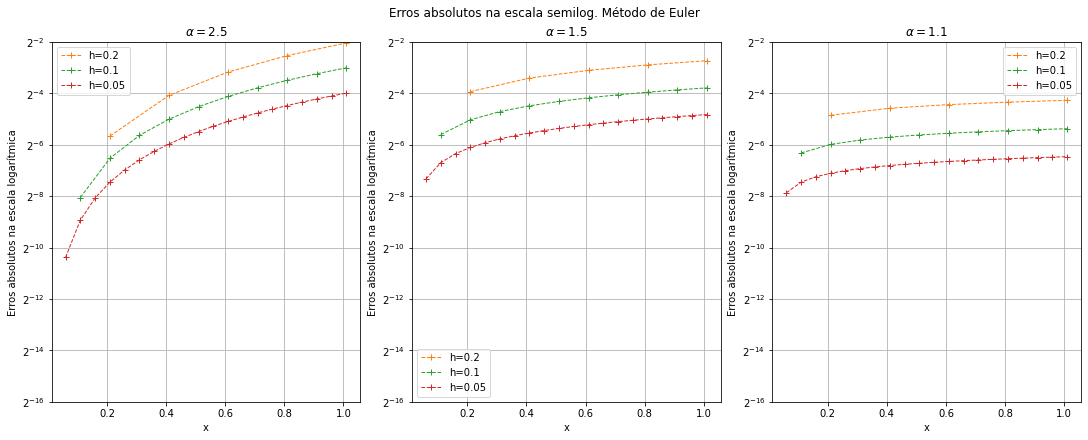

In [11]:
plotar_erros_semilog('Euler', vet_erros_abs_Euler)

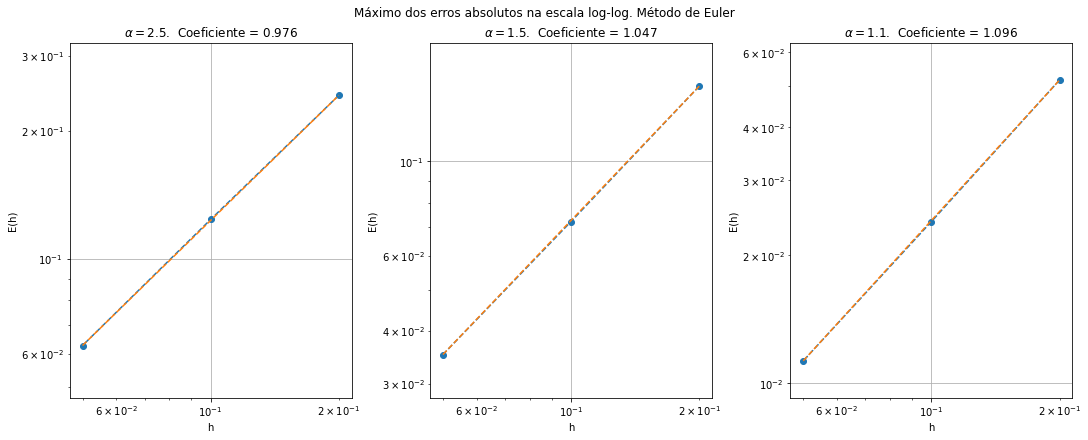

In [12]:
plotar_erros_loglog('Euler', vet_E_Euler)

### 6.2 Método de Taylor 2

In [13]:
#Implementação método de Taylor2
vet_E_Taylor2 = []
vet_erros_abs_Taylor2 =[]
for alpha in lista_alpha:
    erros_abs, E = implementa_metodo(passo_Taylor2)
    vet_E_Taylor2.append(E)
    vet_erros_abs_Taylor2.append(erros_abs)

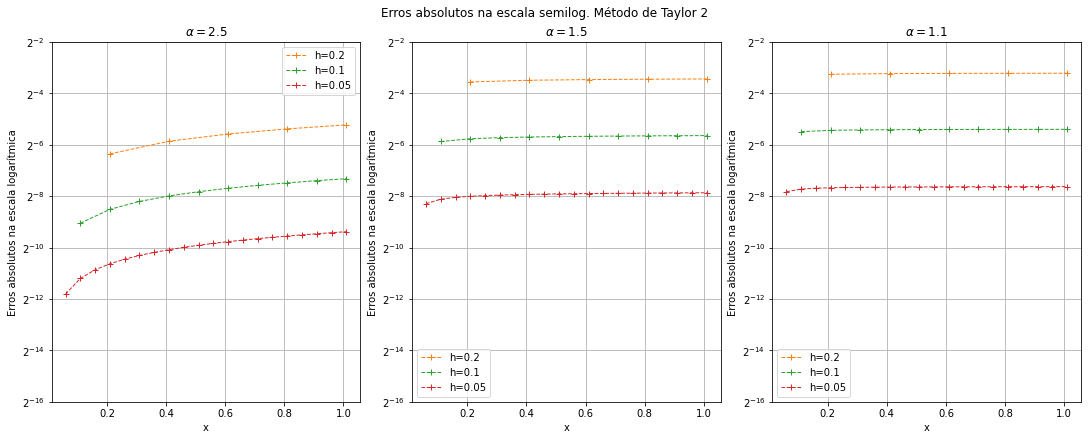

In [14]:
plotar_erros_semilog('Taylor 2', vet_erros_abs_Taylor2) 

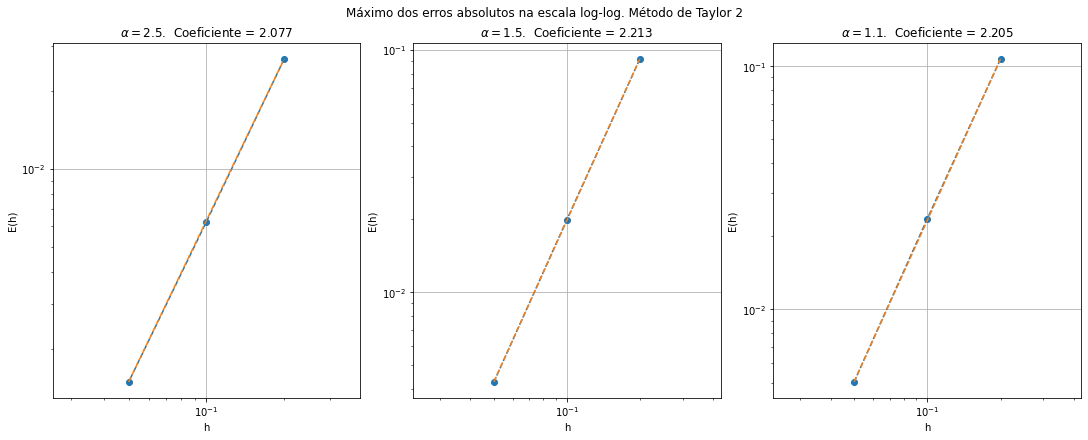

In [15]:
plotar_erros_loglog('Taylor 2', vet_E_Taylor2)

### 6.3 Método de Taylor 4

In [16]:
#Implementação método de Taylor4
vet_E_Taylor4 = []
vet_erros_abs_Taylor4 =[]
for alpha in lista_alpha:
    erros_abs, E = implementa_metodo(passo_Taylor4)
    vet_E_Taylor4.append(E)
    vet_erros_abs_Taylor4.append(erros_abs)

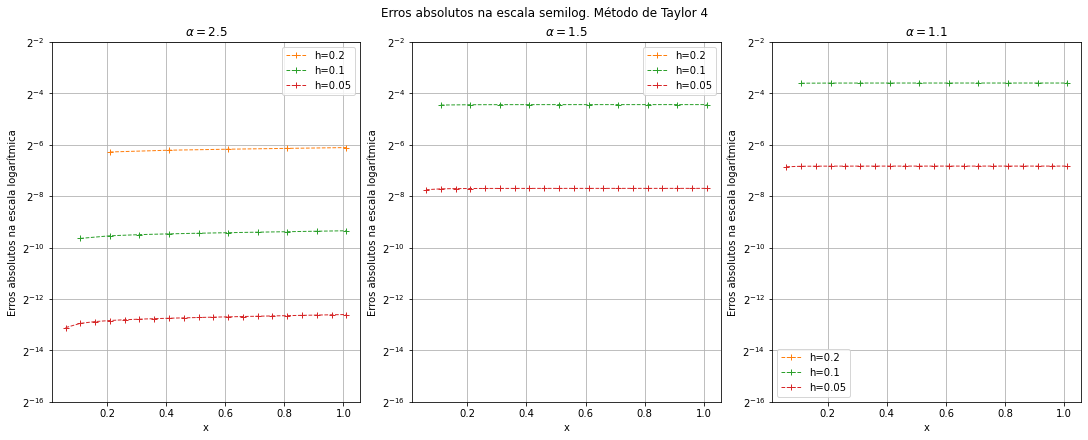

In [17]:
plotar_erros_semilog('Taylor 4', vet_erros_abs_Taylor4)

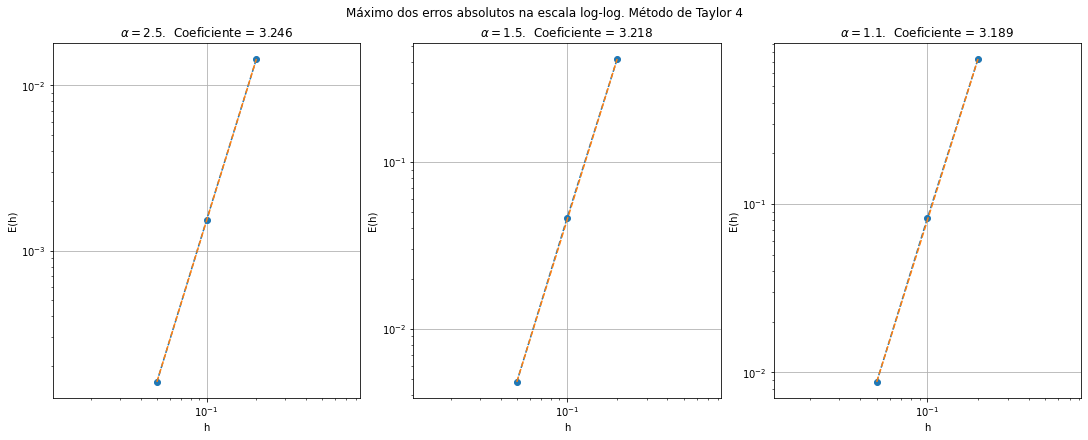

In [18]:
plotar_erros_loglog('Taylor 4', vet_E_Taylor4)